In [ ]:
#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Task 1: Initial Data Exploration

In [ ]:
data = pd.read_csv("gold_price.csv")
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [ ]:
dt = data[['USD (AM)']]
dt.head()

,USD (AM)
0,272.80
1,269.00
2,268.75
3,268.00
4,268.60


In [ ]:
#Data Visualization

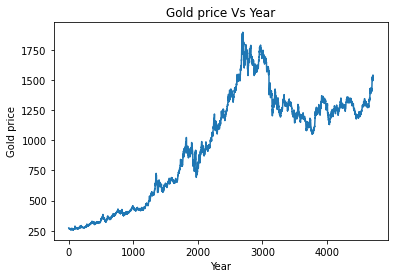

In [ ]:
#graphical representation of gold price vs year
plt.title('Gold price Vs Year')  #-----title of plot
dt['USD (AM)'].plot()                  #---plot according to close value

# defining x& y axis
plt.xlabel('Year')
plt.ylabel('Gold price')

#show the graph
plt.show()

In [ ]:
#Task 2: Create Train & Test Sets

In [ ]:
dt['MA_5'] = data['USD (AM)'].rolling(window = 5).mean()

dt['MA-10'] = data['USD (AM)'].rolling(window = 10).mean()
dt = dt.dropna()
# dt['MA-10']

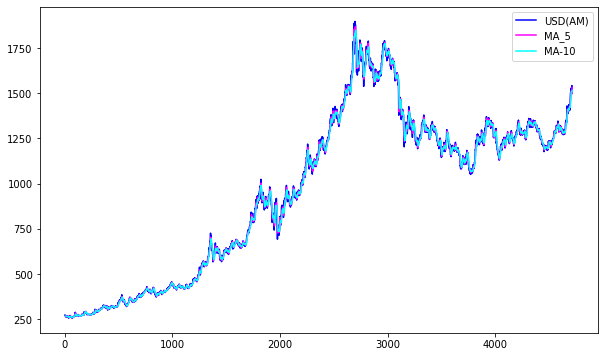

In [ ]:
# visulization of moving average 15, 30 days vs  close value
plt.figure(figsize =(10,6))
plt.plot(data['USD (AM)'],label = 'Given_price',color='blue')
plt.plot(dt['MA_5'],label = ' moving average 5days',color='magenta')
plt.plot(dt['MA-10'],label = 'moving average 10 days',color='cyan')

plt.legend(['USD(AM)','MA_5','MA-10'])
plt.show()

In [ ]:
# train & test  spliting

X = dt[['MA_5','MA-10']]
y = dt['USD (AM)']

t = 0.8
t = int(t*len(dt))
X_train,X_test,y_train,y_test = X[:t].round(4),X[t:].round(4),y[:t].round(4),y[t:].round(4)

# X_train,X_test,y_train,y_test

In [ ]:
#Task 3: Develop Models & Predictions

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
dt.isnull().sum()

USD (AM)    0
MA_5        0
MA-10       0
dtype: int64

In [ ]:
dt = dt[['USD (AM)','MA_5','MA-10']]
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 9 to 4717
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   USD (AM)  4709 non-null   float64
 1   MA_5      4709 non-null   float64
 2   MA-10     4709 non-null   float64
dtypes: float64(3)
memory usage: 147.2 KB


In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

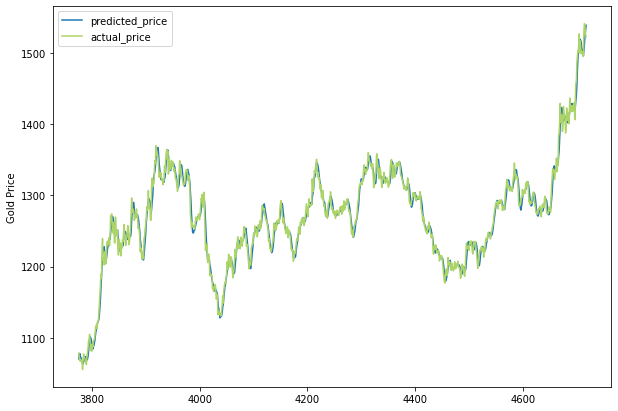

In [ ]:
#visualization through actual price vs predicted price of gold
predicted_price = reg.predict(X_test) 
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,7))  

y_test.plot(color='#add466')  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold Price")  

plt.show()

In [ ]:
# accurancy -->r^2 score of the model
r2_score = reg.score(X[t:],y[t:])*100 

float("{0:.2f}".format(r2_score))

98.25